In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
EXPERIMENT = 'environment_convergence'

df = pd.read_csv(f'./results/{EXPERIMENT}_results.csv', sep=', ', engine='python')

In [11]:
df.head(5)

,params_index,n_variables,n_total_environments,sparsity,intervention_targets,sample_size,dag_density,reps,data_simulator,dag_simulator,...,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
0,0,6,10,1,None,500,0.3,20,cdnod,er,...,0,3,3,2,4,0.0,0.0,1.0,0.0,0.0
1,0,6,10,1,None,500,0.3,20,cdnod,er,...,0,3,3,2,4,0.0,0.0,1.0,0.0,0.0
2,0,6,10,1,None,500,0.3,20,cdnod,er,...,0,3,3,2,4,0.0,0.0,1.0,0.0,0.0
3,0,6,10,1,None,500,0.3,20,cdnod,er,...,0,3,3,2,4,0.0,0.0,1.0,0.0,0.0
4,0,6,10,1,None,500,0.3,20,cdnod,er,...,0,2,3,2,4,0.5,0.0,1.0,0.5,0.5


In [6]:
plot_df = df.melt(
    id_vars=[
        'params_index', 'n_variables', 'n_total_environments', 'sparsity',
        'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
        'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
    # value_vars=['True orientation rate', 'False orientation rate', 'Average precision'], # 'Fraction of possible DAGs'], 
    value_vars=['Precision', 'Recall', 'Average precision'],
    var_name='Metric',
    value_name='Average fraction',
)

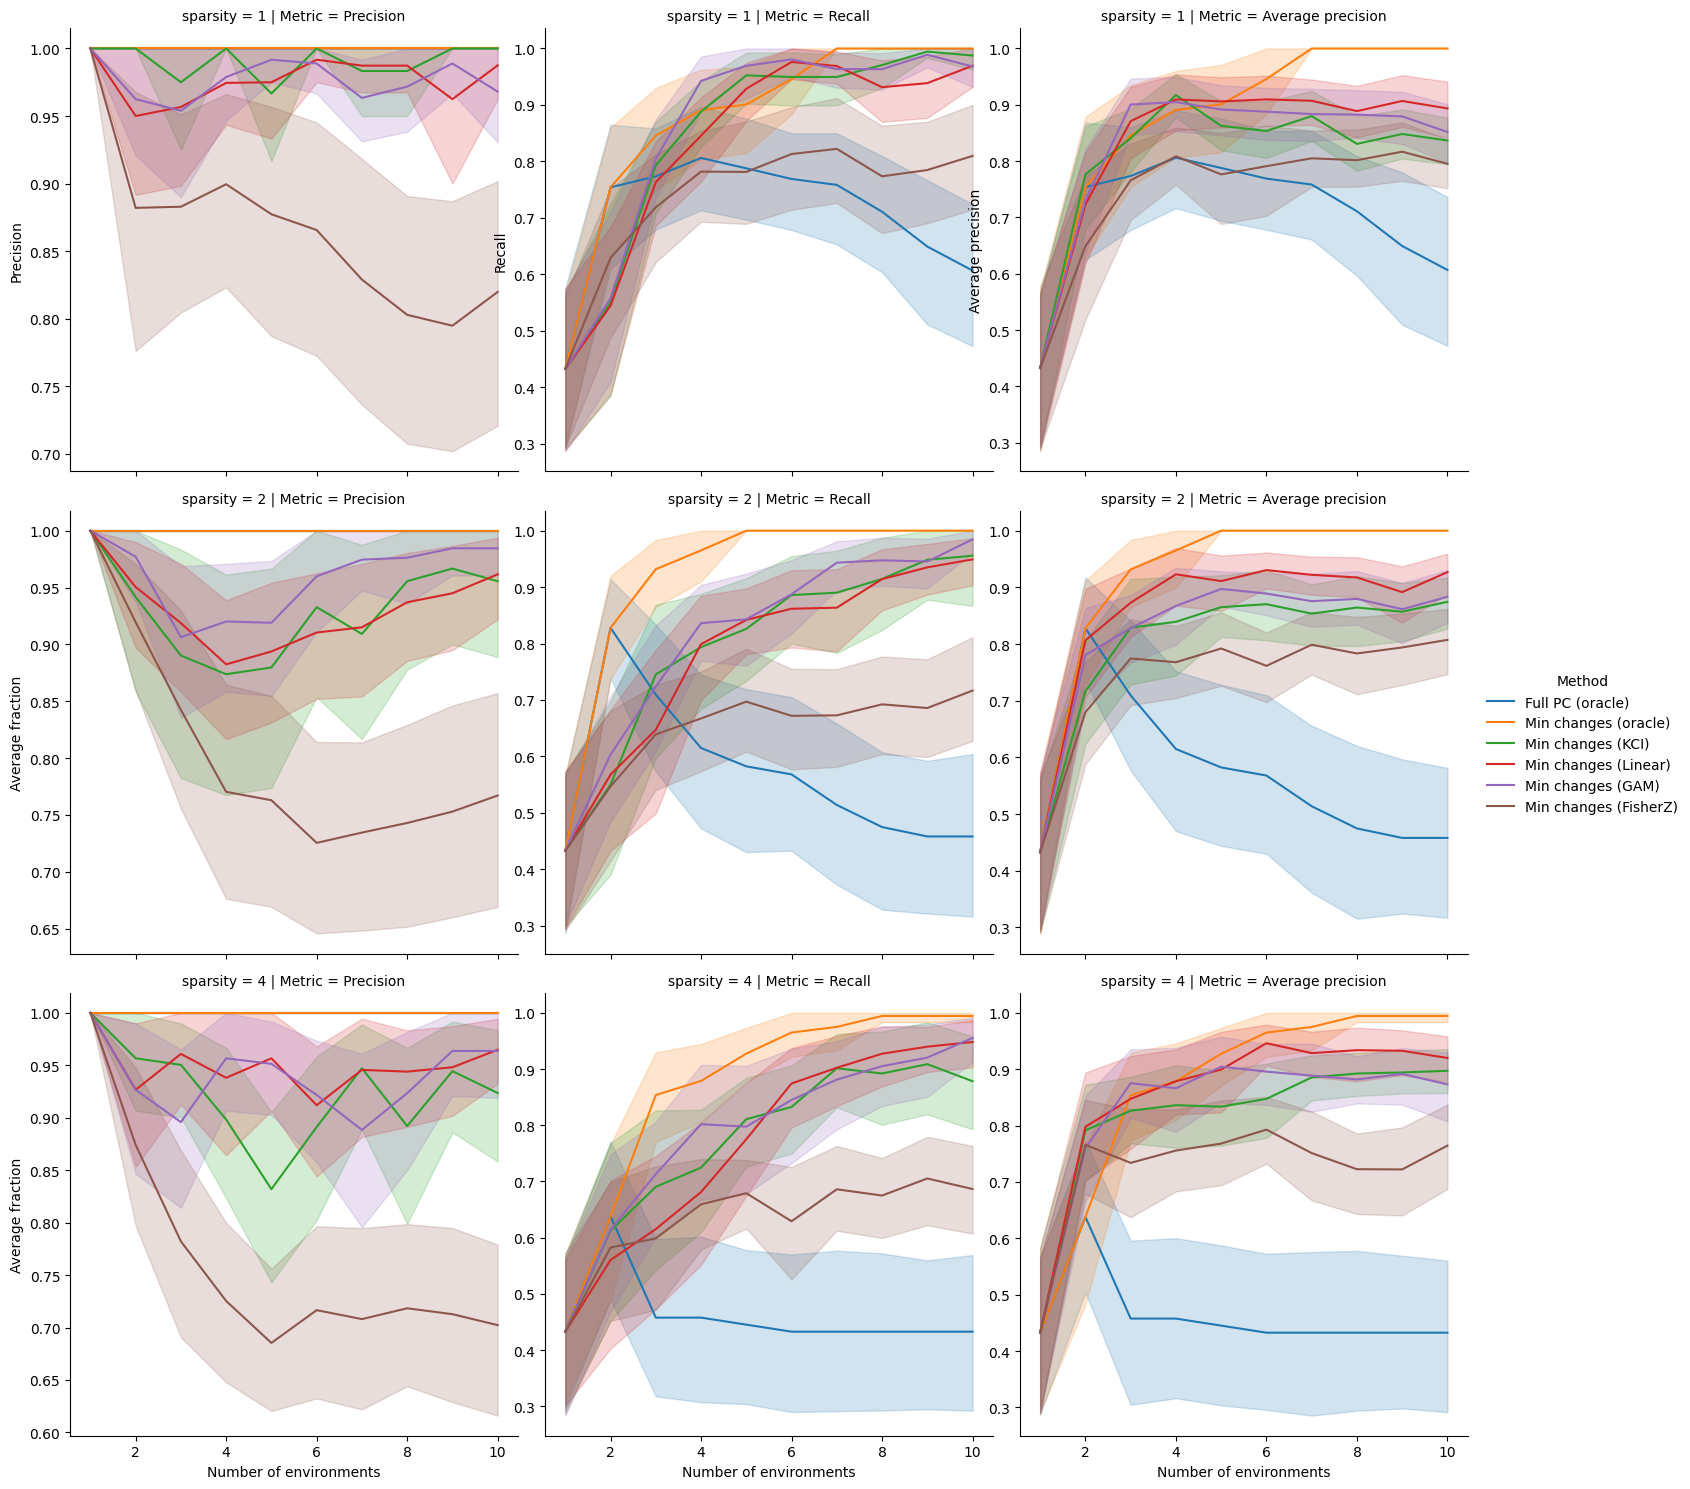

In [14]:
for ds in df['dag_simulator'].unique():
    g = sns.relplot(
        data=plot_df[
            (plot_df['sample_size'] == plot_df['sample_size'].max())
            & (plot_df['dag_simulator'] == ds)
            & (plot_df['Soft'] == False)
            # & (plot_df['sparsity'].isin([2, 4]))
        ],
        x='Number of environments',
        y='Average fraction',
        hue='Method',
        row='sparsity',
        col='Metric',
        # ci=None,
        kind='line',
        # height=3,
        # aspect=2, # 3,
        # legend='Full',
        facet_kws={'sharey': False, 'sharex': True},
    )
    
    col_vals = g.data[g._col_var].unique()
    for c, col_val in enumerate(col_vals):
        g.axes[0, c].set_ylabel(col_val, visible=True)
    
#     row_vals = g.data[g._row_var].unique()
#     for r, row_val in enumerate(row_vals):
#         for c, col_val in enumerate(col_vals):
#             g.axes[r, c].set_title(f'{g._row_var} = {row_val}')
#             g.axes[r, c].set_ylabel(col_val, visible=True)
    
    title_dict = dict({"er": "Erdos-Renyi", "ba": "Hub"})
    # g.fig.suptitle(f'DAG model: {title_dict[ds]}', fontsize=14, y=1.02, x=0.45)
    plt.subplots_adjust(wspace=0.06)
    plt.show()